In [1]:
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.models.tools import HoverTool
import numpy as np
# Any others you might need

In [2]:
def read_ARROW_data(filename):
    """Reads in and partially processes an  ARROW spectrum
    
    The spectrum file contains a number of header lines indicated by `#' or blanks. 
    This function splits these from the main data and returns both 
            
    Parameters
    ----------
    filename : str
        Name of the spectrum file
    
    Returns
    -------
    dat : class: pandas.DataFrame
        Spectrum data
    Header lines : list of str
        List of header lines
    """
    
    # Read lines till first line not starting with #, or whitespace.
    # Store these as a list
    header_list = []
    number_header_lines = 0
    dat = None
    with open(filename) as f:
        line = f.readline()
        while line[0] == '#' or line[0] == ',' or line[0].isspace():
            header_list.append(line)
            number_header_lines += 1
            line = f.readline()
        dat = pd.read_csv(filename, header = number_header_lines, skipinitialspace = True)

    return dat, header_list

In [3]:
# Function to convert frequency to radial velocity. Normally expect this to be placed at the
# start of the program

def freq_to_vel(freq, f0=1420.4e6):
    ''' Takes a frequency value (or Pandas Dataframe column or Series) and returns
    a velocity value (or new Dataframe column of values). f0 is the rest
    frequency and defaults to 1420.4 MHz'''
    from astropy import units as u
    from astropy import constants as const
    
    # We need a value for 'c' - thespeed of light. 
    # You can either define it explicitly here or alternatively, use the 
    # Astropy constants
    c = const.c.value
    v = (((-c*freq)/(freq+f0))/1000)*(u.km/u.s)
    #
    #v = # DO YOUR CALCULATION HERE - probably use km/s for convenience 
    #
    
    return v  #(km/s)                          

In [4]:
# Prompt the user for a file name (we'll call it file_name)
# You should know how to do this by now
file_name = input('Enter file name:')

spectrum_df, header_lines = read_ARROW_data('../data/' + file_name + '.csv')

# Display the first few lines - does it look reasonable?
spectrum_df.head(4)


Enter file name:l120


,frequency,intensity
0,-800000,2.061
1,-795000,2.051
2,-790000,2.029
3,-785000,2.009


In [5]:
# Read in the background spectra, average and subtract from the spectrum
# Here we use  hard-wired file names but you could use a file list, or manually enter them
number_header_lines = 12

# This example assumes that you have three background scans 
# called 'bg1.csv', 'bg2.csv' and 'bg3.csv'
# Modify these lines if your background files have different names
# We again use skipinitialspace = True to ignore the space in the 'intensity' column name
bg1 = pd.read_csv('../data/NGP1.csv', header = number_header_lines, skipinitialspace = True)
bg2 = pd.read_csv('../data/NGP2.csv', header = number_header_lines, skipinitialspace = True)
bg3 = pd.read_csv('../data/NGP3.csv', header = number_header_lines, skipinitialspace = True)
bg4 = pd.read_csv('../data/NGP4.csv', header = number_header_lines, skipinitialspace = True)
bg5 = pd.read_csv('../data/NGP5.csv', header = number_header_lines, skipinitialspace = True)
bg6 = pd.read_csv('../data/NGP6.csv', header = number_header_lines, skipinitialspace = True)
bg7 = pd.read_csv('../data/NGP7.csv', header = number_header_lines, skipinitialspace = True)
bg8 = pd.read_csv('../data/NGP8.csv', header = number_header_lines, skipinitialspace = True)
bg9 = pd.read_csv('../data/NGP9.csv', header = number_header_lines, skipinitialspace = True)
bg10 = pd.read_csv('../data/NGP10.csv', header = number_header_lines, skipinitialspace = True)


# Compute average intensity values
bg_av = ((bg1['intensity']+bg2['intensity']+bg3['intensity']+bg4['intensity']+bg5['intensity']+bg6['intensity']+bg7['intensity']+bg8['intensity']+bg9['intensity']+bg10['intensity'])/10)
print(type(bg_av))
# Subract from spectrum intensity
spectrum_df['intensity'] = spectrum_df['intensity']-bg_av.values

spectrum_df.head(4)


<class 'pandas.core.series.Series'>


,frequency,intensity
0,-800000,0.0367
1,-795000,0.0481
2,-790000,0.0452
3,-785000,0.0330


In [6]:
# Convert frequency to radial velocity values using this function
spectrum_v = freq_to_vel(spectrum_df['frequency'])

# Add a new 'velocity' column with these values
spectrum_df['velocity'] = spectrum_v

spectrum_df

,frequency,intensity,velocity
0,-800000,0.0367,168.944750
1,-795000,0.0481,167.888254
2,-790000,0.0452,166.831765
3,-785000,0.0330,165.775284
4,-780000,0.0413,164.718810
...,...,...,...
396,1180000,-0.0035,-248.846425
397,1185000,-0.0111,-249.899980
398,1190000,0.0066,-250.953527
399,1195000,-0.0019,-252.007068


Loading BokehJS ...

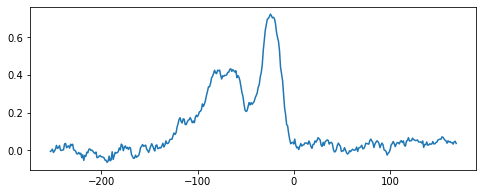

In [7]:

from bokeh.plotting import figure, output_notebook, show
from bokeh.models.tools import HoverTool

output_notebook() 
p = figure(title = "Radial Velocity against Intensity", x_axis_label = 'Radial Velocity (km/s)', y_axis_label = 'Intensity', plot_width=800, plot_height=300)
p.line(spectrum_df['velocity'], spectrum_df['intensity'])
p.add_tools(HoverTool(mode='vline'))
show(p)

import matplotlib.pyplot as plt
plt.figure (figsize=(8,3))
plt.plot (spectrum_df['velocity'], spectrum_df['intensity'])


In [8]:
# Prompt for a new file name
new_file_name = input ('Enter new file name:')
with open(new_file_name+'.csv', mode='w') as spectrum:
    spectrum.writelines(header_lines)
spectrum_df.to_csv(new_file_name+'.csv',index=False, mode='a')
# First write the header lines that we read in earlier to the file.
# Use the .writelines() function from FileIO section 2.1

# Now APPEND the modified csv data using the pandas .to_csv() method 
# UsingPandas section 3 should help

Enter new file name:l120NGP
